In [0]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [0]:
def show_julia_map(x_size, y_size, c, iterations, z_max=10, fraction=2):
  img = np.zeros((y_size, x_size))

  # abs(z) < 2
  xmin, xmax = -2, 2
  ymin, ymax = -2, 2
  xwidth = xmax - xmin
  yheight = ymax - ymin

  for x in range(x_size):
    for y in range(y_size):
      z = complex(x / x_size * xwidth + xmin, y / y_size * yheight + ymin)
      iter_num = 0

      while abs(z) <= z_max and iter_num < iterations:
        z = z**fraction + c
        iter_num += 1

      img[x, y] = iter_num / iterations

  fig, ax = plt.subplots()
  ax.set_xlabel('RE(z)')
  ax.set_ylabel('Im(z)')

  ax.set_xticks([int(i / 4 * x_size) for i in np.arange(-2, 2, 8)])
  ax.set_yticks([int(i / 4 * y_size) for i in np.arange(-2, 2, 8)])

  ax.set_xticklabels(np.arange(-2, 2, 8))
  ax.set_yticklabels(np.arange(-2, 2, 8))

  ax.imshow(img, cmap=cm.hot)


I have found explanation and some parameters here: https://en.wikipedia.org/wiki/Julia_set

##Julian set

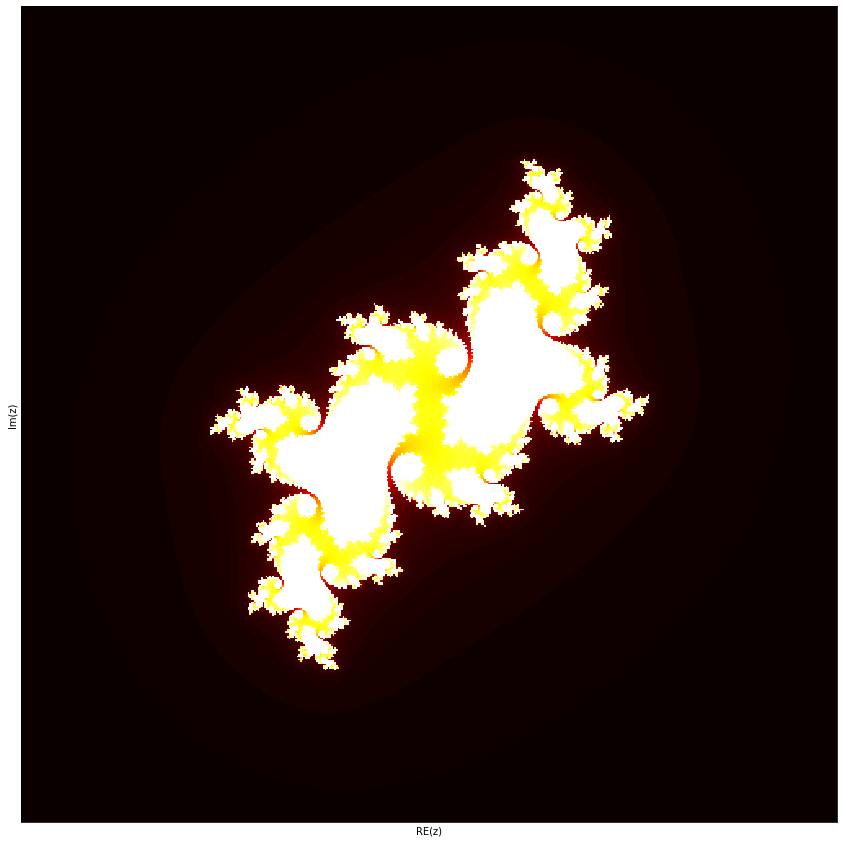

In [41]:
show_julia_map(x_size=500, y_size=500, c=complex(-0.1, 0.65), iterations=100, z_max=10, fraction=2)

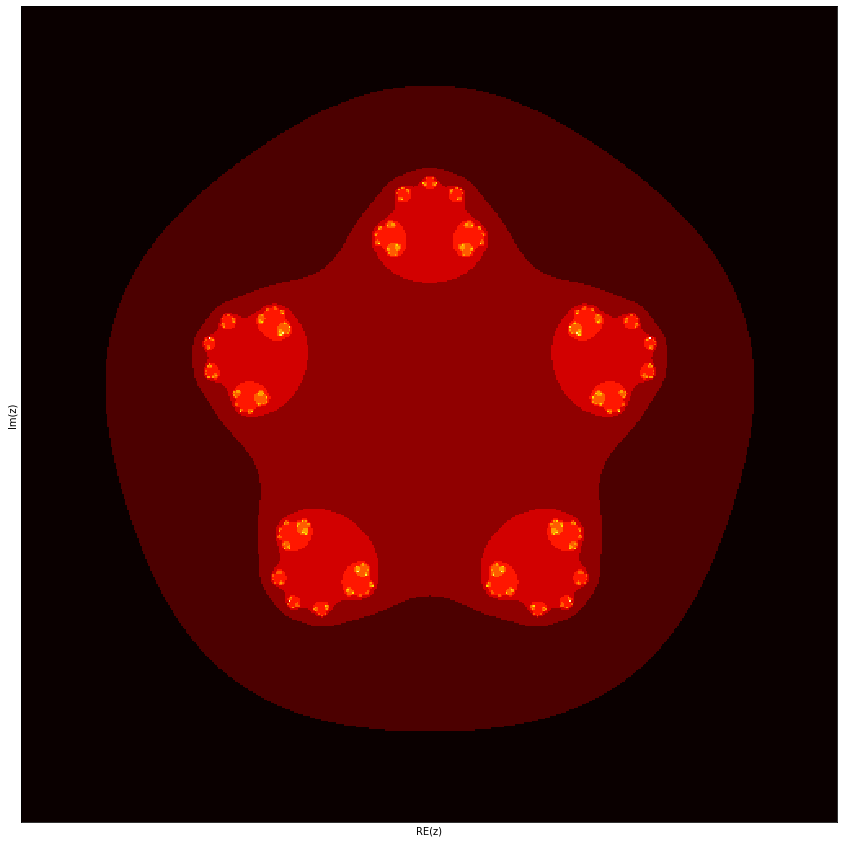

In [30]:
show_julia_map(x_size=500, y_size=500, c=complex(1, 0), iterations=100, z_max=10, fraction=5)